In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from sklearn import preprocessing

In [5]:
# Read in data from CSV
clean_df = pd.read_csv('/content/cleaned_data_revisedSet_noNull2.csv')
clean_df.head()

,max_ma,min_ma,genus,lng,lat,lithology1,environment,time_bins,Orn0Saur1
0,83.5,70.6,Centrosaurus,-111.528931,50.737297,not reported,terrestrial,Campanian,0
1,83.5,70.6,Gryposaurus,-111.529999,50.770000,not reported,terrestrial,Campanian,0
2,70.6,66.0,Ankylosaurus,-106.569901,47.637699,not reported,terrestrial,Maastrichtian,0
3,72.1,66.0,Pachycephalosaurus,-106.227776,47.695831,sandstone,channel,Maastrichtian,0
4,157.3,145.0,Stegosaurus,-106.389999,42.035831,not reported,terrestrial,Tithonian,0


In [7]:
# Preprocess catagorical data using LabelEncoder
le = preprocessing.LabelEncoder()
clean_df['genus'] = le.fit_transform(clean_df.genus.values)
clean_df['lithology1'] = le.fit_transform(clean_df.lithology1.values)
clean_df['environment'] = le.fit_transform(clean_df.environment.values)
clean_df['time_bins'] = le.fit_transform(clean_df.time_bins.values)

In [8]:
# Display the encoded dataframe 
clean_df

,max_ma,min_ma,genus,lng,lat,lithology1,environment,time_bins,Orn0Saur1
0,83.5,70.60,263,-111.528931,50.737297,19,45,9,0
1,83.5,70.60,542,-111.529999,50.770000,19,45,9,0
2,70.6,66.00,86,-106.569901,47.637699,19,45,18,0
3,72.1,66.00,974,-106.227776,47.695831,23,3,18,0
4,157.3,145.00,1246,-106.389999,42.035831,19,45,26,0
...,...,...,...,...,...,...,...,...,...
8308,237.0,228.00,992,-8.971667,31.070833,23,19,10,1
8309,130.0,125.45,1077,-0.217791,40.582836,16,10,5,1
8310,72.1,66.00,91,100.373161,43.443558,23,45,18,1
8311,70.6,66.00,1255,-104.427002,43.505402,6,18,18,1


In [52]:
 # Remove taxonomy group(Orn0Saur1) target from features data, drop genus from features
y = clean_df['Orn0Saur1']
X = clean_df.drop(columns=["genus","Orn0Saur1"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=2)

In [53]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [67]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=7))
nn_model.add(tf.keras.layers.Dense(units=22, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
208/208 [==============================] - 1s 2ms/step - loss: 0.6109 - accuracy: 0.6777
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6842
Epoch 3/100
208/208 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7002
Epoch 4/100
208/208 [==============================] - 0s 1ms/step - loss: 0.5734 - accuracy: 0.7027
Epoch 5/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7026
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7068
Epoch 7/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7107
Epoch 8/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7105
Epoch 9/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7090
Epoch 10/100
208/208 [==============================] - 0s 2ms/step - loss: 0.5555 - accura

In [68]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

52/52 - 0s - loss: 0.5148 - accuracy: 0.7511 - 87ms/epoch - 2ms/step
Loss: 0.514805018901825, Accuracy: 0.7510523200035095


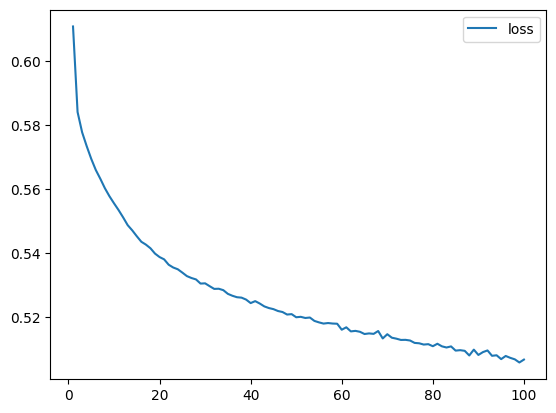

In [71]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

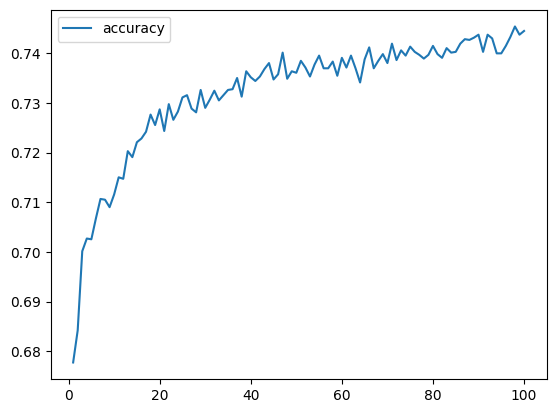

In [72]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()